 __Car Sale Study__

In [1]:
import os,sys,timeit,random,csv,urllib,urllib.request,time,re,statistics
import csv, os, sys, time,calendar,collections
import datetime as dt
from collections import defaultdict,Counter, OrderedDict
from itertools import groupby
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
from mpl_toolkits.basemap import Basemap
from sklearn import datasets, linear_model
from scipy.stats import linregress
import matplotlib.cm as cm
import matplotlib.colors as colors
style.use('fivethirtyeight')
%matplotlib inline

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
os.chdir(r'C:\Users\PythonExercise\_DataIncubator\10262017_DataIncubator')
print(os.getcwd())

C:\Anaconda2\envs\py34\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


C:\Users\PythonExercise\_DataIncubator\10262017_DataIncubator


In [2]:
car_index_url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names'
car_index_code=urllib.request.urlopen(car_index_url).read().decode('utf-8')
car_index=car_index_code.split('\n')
car_index[60:89]    
car_columns=[]
for item in car_index[60:89]:
    if ':' in item: 
        value=item.split(':')[0].split(' ')[-1]
        if value not in car_columns: car_columns.append(value)
print(car_columns,len(car_columns))

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 26


In [3]:
car_price_url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
car_price_df= pd.read_csv(car_price_url, skiprows=0, index_col=False, header=None,names=car_columns,na_values=['?'])
car_price_df[:5]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
car_price_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


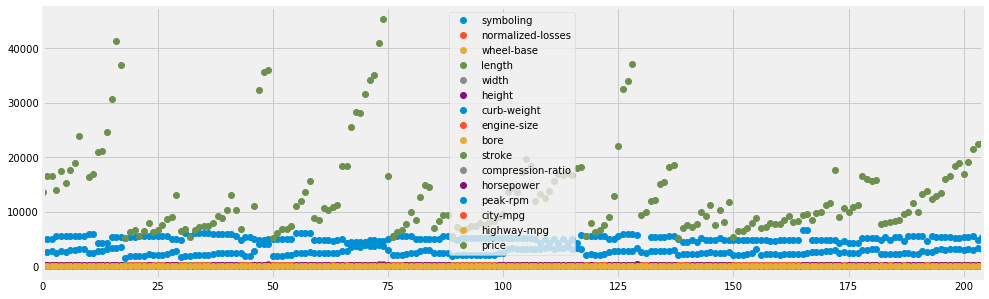

In [5]:
car_price_df.plot(style='o')

__cleaning up data__

In [6]:
car_price_df1=car_price_df.dropna(axis=0,how='any')
print(car_price_df1.shape,car_price_df.shape)

(159, 26) (205, 26)


__convert string of int to int__

In [7]:
'''convert words to integer'''
LowTextString = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10}

def text2num(s):
    a = re.split(r"[\s-]+", s)
    for w in a:
        x=LowTextString.get(w.lower(),None)
        #print(x)
        return x

numlist=[item for item in car_columns if 'num' in item]   
print(numlist)
for col in numlist:
    car_price_df1[col]=car_price_df1[col].apply(text2num) 
car_price_df1[:3]

['num-of-doors', 'num-of-cylinders']


C:\Anaconda2\envs\py34\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0


In [8]:
car_price_df1['price_1']=car_price_df1['price'].apply(lambda strprice: '$'+str(strprice))
car_price_df1[:3]

C:\Anaconda2\envs\py34\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_1
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,$13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,$17450.0
6,1,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0,$17710.0


In [9]:
car_price_df2=car_price_df1.set_index('price')
car_price_df2.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price_1
price,,,,,,,,,,,,,,,,,,,,,,,,,,
13950.0,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,$13950.0
17450.0,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,$17450.0
17710.0,1,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,$17710.0


__plot 1__

<function matplotlib.pyplot.legend>

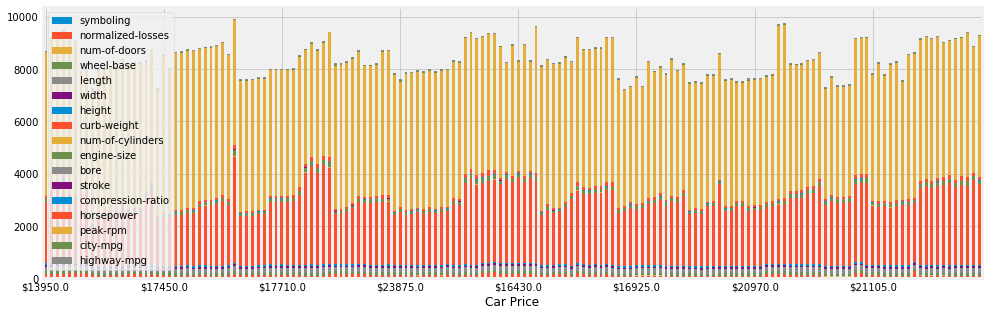

In [10]:
fig=plt.figure(figsize=(10, 8),facecolor='#f0f0f0')
ax=car_price_df2.plot(kind='bar', stacked=True);
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=10,prune='lower'))
ax.set_xticklabels(car_price_df2['price_1'], rotation=0)
#for label in ax.xaxis.get_ticklabels(): label.set_rotation(0)
plt.xlabel('Car Price')
plt.legend

__plot 2__

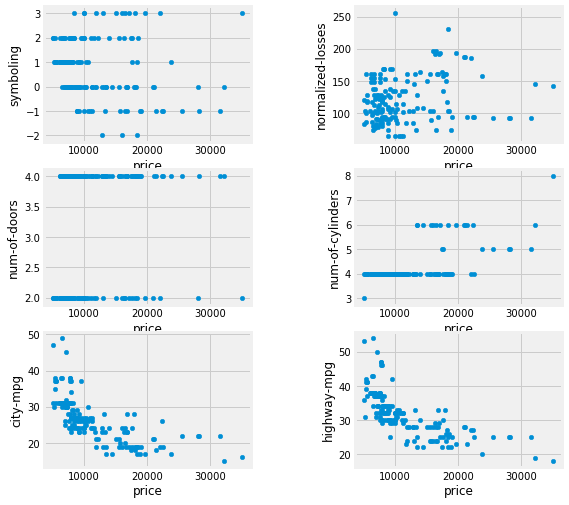

In [11]:
plotlist=['symboling','normalized-losses','num-of-doors','num-of-cylinders','city-mpg','highway-mpg']
colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(plotlist))]
#colorlist='ckbgry'
fig = plt.figure(1, figsize = (10,8))
plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
for i, col in enumerate(plotlist):
    plt.subplot(3,2,i+1)
    car_price_df1.plot.scatter(x='price',y = col, ax = plt.gca(), cmap="jet", colorbar=False,  use_index=True)

__plot 3__

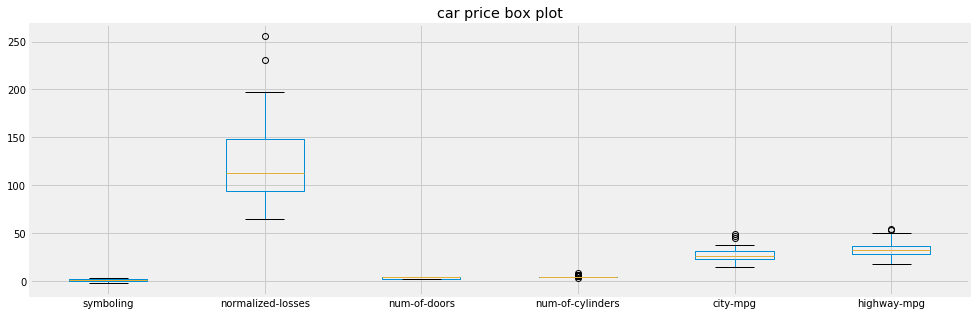

In [12]:
fig = plt.figure(1, figsize = (10,8))
plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
dfbox=car_price_df2[plotlist]
dfbox.plot.box()
plt.title('car price box plot')

In [13]:
car_price_df.corr()[:3]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642


__plot 4__

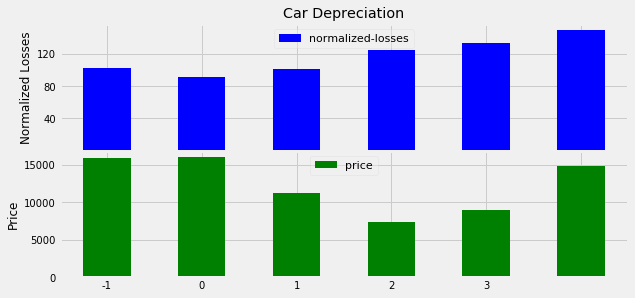

In [14]:
fig=plt.figure(figsize=(10, 8),facecolor='#f0f0f0')
'''subplots'''
ax1=plt.subplot2grid((6,1),(0,0),rowspan=2)
plt.title('Car Depreciation')
plt.ylabel('Normalized Losses')
ax2=plt.subplot2grid((6,1),(2,0),rowspan=2,sharex=ax1)
plt.xlabel('Symboling')
plt.ylabel('Price')

car_price_df.groupby('symboling')['normalized-losses'].aggregate(np.median).plot.bar(ax=ax1,color='b',label='normalized-losses')
car_price_df.groupby('symboling')['price'].aggregate(np.median).plot.bar(ax=ax2,color='g',label='price')
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4,prune='lower'))
ax1.grid(True)
for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(0)
ax2.xaxis.set_major_locator(mticker.MaxNLocator(6))
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4,prune='upper'))
ax2.grid(True)

plt.setp(ax1.get_xticklabels(),visible=False)
plt.setp(ax2.get_xticklabels(),visible=True)  

plt.subplots_adjust(left=0.11,bottom=0.24,right=0.90,top=0.90,wspace=0.2,hspace=0)

plt.legend()
ax1.legend()
leg=ax1.legend(loc=9,ncol=2,prop={'size':11})
leg.get_frame().set_alpha(0.4)
ax2.legend()
leg=ax2.legend(loc=9,ncol=2,prop={'size':11})
leg.get_frame().set_alpha(0.4)
plt.xlabel('Symbloing')
plt.show()

__Linear Regression__

(159, 1) (159, 1)


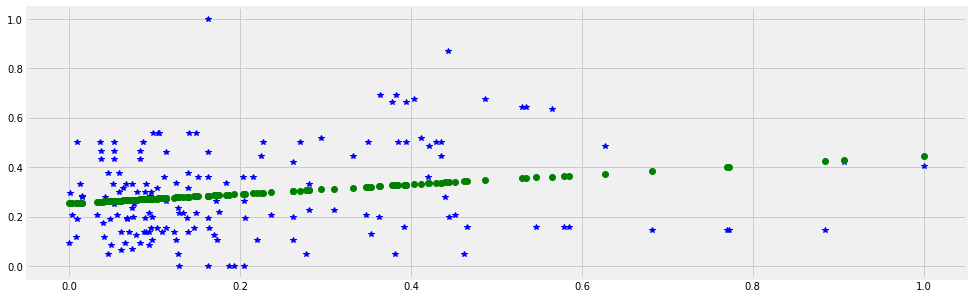

In [15]:
x=car_price_df1[['price']].copy()
x=(x-x.min())/(x.max()-x.min())
y=car_price_df1[['normalized-losses']].copy()
y=(y-y.min())/(y.max()-y.min())
print(x.shape,y.shape)

lin_reg=linear_model.LinearRegression()
lin_reg.fit(x,y)
plt.plot(x,y,'b*')
plt.plot(x,lin_reg.predict(x),'go')
plt.show()